In [31]:
import pandas as pd
df=pd.read_csv('/content/Mall_Customers.csv')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [33]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


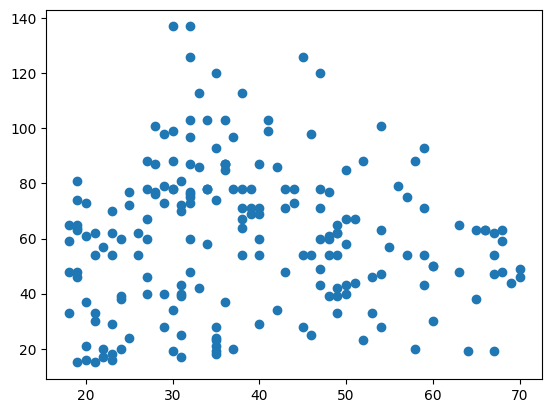

In [34]:
import matplotlib.pyplot as plt
plt.scatter(df['Age'],df['Annual Income (k$)'])


In [35]:
# df1=df[['Annual Income (k$)','Spending Score (1-100)']]

In [36]:
from sklearn.cluster import KMeans

In [41]:
# df1.sample(10)

,Annual Income (k$),Spending Score (1-100),Cluster
179,93,90,KMeans(n_clusters=5)
165,85,75,KMeans(n_clusters=5)
134,73,5,KMeans(n_clusters=5)
185,99,97,KMeans(n_clusters=5)
16,21,35,KMeans(n_clusters=5)
72,50,49,KMeans(n_clusters=5)
131,71,75,KMeans(n_clusters=5)
197,126,74,KMeans(n_clusters=5)
144,77,12,KMeans(n_clusters=5)
161,79,83,KMeans(n_clusters=5)


In [44]:
from sklearn.cluster import KMeans

# Select features for clustering (numeric only!)
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Fit KMeans and get cluster labels
Kn = KMeans(n_clusters=5, random_state=42)
labels = Kn.fit_predict(X)

# Add labels back to dataframe
df['Cluster'] = labels
print(df.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        4  
1        2  
2        4  
3        2  
4        4  


In [46]:
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(df1)
    wcss.append(km.inertia_)

In [47]:
wcss

[270399.28000000014,
 182083.794317727,
 106678.86749942403,
 74189.7114033266,
 44463.226479679724,
 37472.65122182695,
 30290.060978736696,
 25407.918629558844,
 26301.168856305194,
 21087.393357017598]

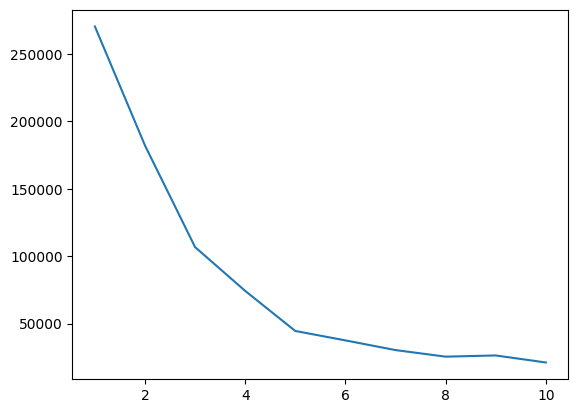

In [48]:
plt.plot(range(1,11),wcss)

THE BEST VALUE OF K=5

In [51]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values  # <- converts to numpy


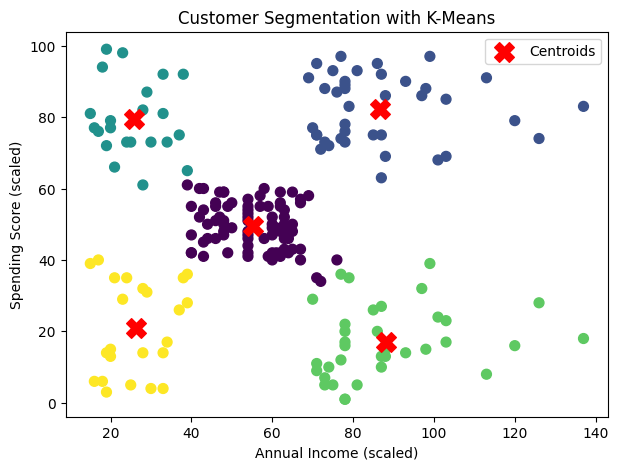

In [52]:
# Re-fit with optimal K (say 5 from elbow)
kmeans_opt = KMeans(n_clusters=5, random_state=42)
labels_opt = kmeans_opt.fit_predict(X)

# Plot clusters
plt.figure(figsize=(7,5))
plt.scatter(X[:,0], X[:,1], c=labels_opt, cmap='viridis', s=50)
plt.scatter(kmeans_opt.cluster_centers_[:,0], kmeans_opt.cluster_centers_[:,1],
            s=200, c='red', marker='X', label='Centroids')
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.title("Customer Segmentation with K-Means")
plt.legend()
plt.show()


In [54]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X, labels_opt)
print("Silhouette Score for K=5:", sil_score)

Silhouette Score for K=5: 0.553931997444648
